# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

In [4]:
# np.argmax()
a = np.array([[1,2,3],[3,1,2]])
a

array([[1, 2, 3],
       [3, 1, 2]])

In [5]:
np.argmax(a, axis = 0) # 행방향에서 누가 제일 크냐(1행:3, 2행:2, 3행:3 1행에서 3은 2열이니까 1, 나머지는 1열이라서 0 (index는 0부터 시작))

array([1, 0, 0])

In [6]:
np.argmax(a, axis = 1)

array([2, 0])

In [7]:
np.argmax(a)

np.int64(2)

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [8]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [9]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [10]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [12]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [13]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

### (1) 모델 설계

In [14]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [15]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense( 3, activation = 'softmax')] ) # 출력층 노드:3, 활성화 함수: softmax

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [16]:
model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 1.1562 - val_loss: 0.9698
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9479 - val_loss: 0.7617
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7995 - val_loss: 0.6321
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6683 - val_loss: 0.5408
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5894 - val_loss: 0.4801
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5321 - val_loss: 0.4322
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5009 - val_loss: 0.3957
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4610 - val_loss: 0.3704
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4446 - val_loss: 0.3480
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4400 - val_loss: 0.3321
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3829 - val_loss: 0.3174
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3672 - val_loss: 0.3069
E

* 학습결과 그래프

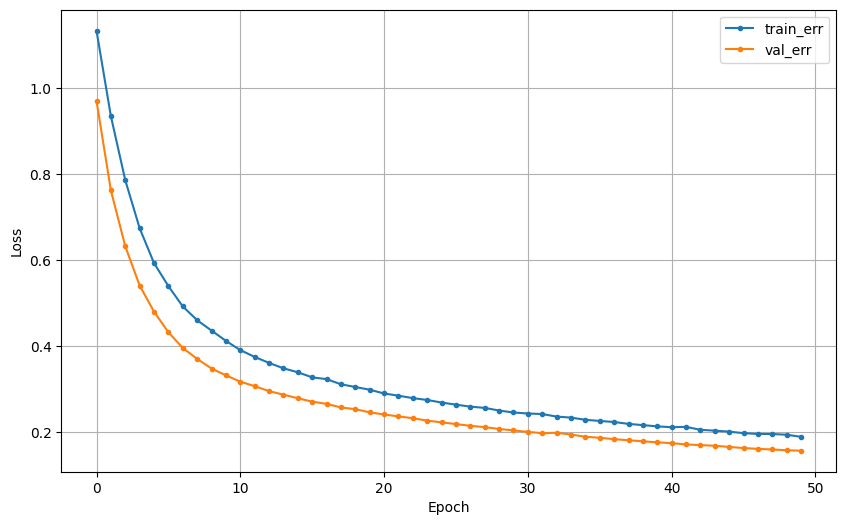

In [17]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [18]:
pred = model.predict(x_val)
pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[9.8198599e-01, 1.7972395e-02, 4.1524261e-05],
       [1.1706882e-02, 8.0353177e-01, 1.8476140e-01],
       [1.1863400e-02, 7.3988277e-01, 2.4825388e-01],
       [2.9523071e-04, 3.2161629e-01, 6.7808843e-01],
       [3.5246495e-02, 8.9047498e-01, 7.4278533e-02]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [19]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 1, 1, 2, 1])

In [20]:
pred_1 = pred.argmax(axis=1)
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       2])

:* 실제값 y_val은 0,1,2 로 된 1차원 값입니다. (정수 인코딩 해놔서)

In [21]:
y_val

,Species
47,0
73,1
74,1
129,2
67,1
89,1
143,2
21,0
108,2
12,0


In [22]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 16  2]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      0.89      0.84        18
           2       0.83      0.71      0.77        14

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



----

## 4.모델링2 : 은닉층

### (1) 모델

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [23]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Input(shape = (nfeatures,)),
                    Dense(8, activation = 'relu'),
                    Dense(3 , activation = 'softmax')
])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

* compile + 학습

In [24]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.1589 - val_loss: 1.1522
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.1173 - val_loss: 1.1143
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.0870 - val_loss: 1.0849
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.0655 - val_loss: 1.0579
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.0504 - val_loss: 1.0300
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.0414 - val_loss: 1.0009
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9908 - val_loss: 0.9716
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.9768 - val_loss: 0.9417
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9268 - val_loss: 0.9132
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9216 - val_loss: 0.8843
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.8899 - val_loss: 0.8556
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8545 - val_loss: 0.8259
E

* 학습결과 그래프

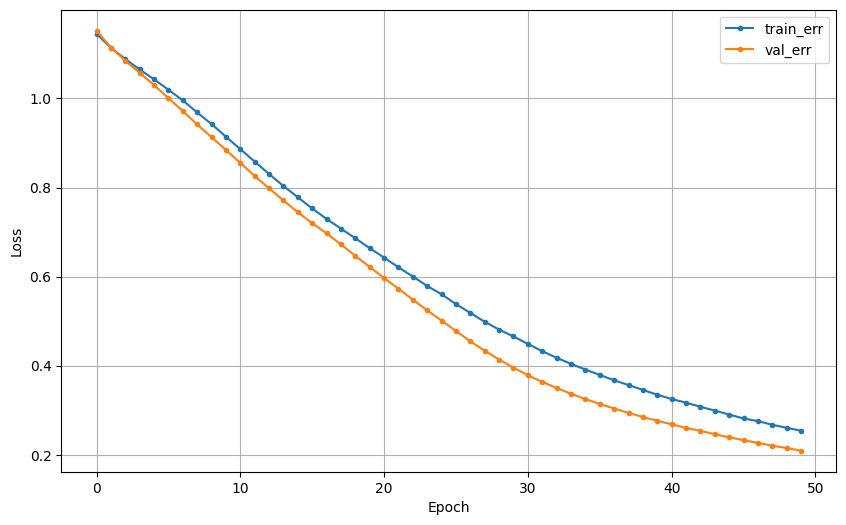

In [25]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [26]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [27]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



### (2) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

* compile + 학습

* 학습결과 그래프

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

### (3) 실습2

* 여러분이 원하는 형태로 설계를 해 봅시다.

* compile + 학습

* 학습결과 그래프

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [ ]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [ ]:
y

In [ ]:
y_c = to_categorical(y.values, 3)

In [ ]:
y_c[:5]

### (2) 데이터 분할2 : train : val

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

In [ ]:
y_train.shape

### (3) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

In [ ]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential([Input(shape = (nfeatures,)),
                    Dense(3, activation = 'softmax')])

# 모델요약
model.summary()

### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

* 학습결과 그래프

In [ ]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred[:5]

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

In [ ]:
y_val

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [ ]:
y_val[:5]

In [ ]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

In [ ]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))